# Visualize MRSI Data
This notebook is used to generate the MRSI plots used in the paper. 

**Note:** This code requires to load the fully generated data at 3mm resolution (the h5-file). Change the pathname accordingly for your own device (`path2fulldata`)

In [14]:
from DigitalPhantom import DigitalPhantom
from simulation.basis import Basis
from utils.visualizations import plot_mrsi
from utils.auxillary import downsample_metab_map, downsample_mrsi
import numpy as np
import h5py

In [15]:
### BigBrainMR parameters ###
# skeleton              = 'BigBrainMR'
# target_resolution     = (6.0, 6.0, 6.0)
# coordinates_high      = [32, 26, 30]
# coordinates_low       = [16, 13, 15]
# coordinates_high      = [45, 24, 30]
# coordinates_low       = [22, 11, 15]

### MRiLab parameters ###
skeleton              = 'MRiLab'
target_resolution     = (6.0, 6.0, 6.0)
coordinates_high      = [36, 30, 30]
coordinates_low       = [18, 15, 15]
# coordinates_high      = [48, 29, 30]
# coordinates_low       = [24, 14, 15]

### Path to the full data generated at 3.0mm resolution ###
path2fulldata= f'/Volumes/Samsung_T7/data/Digital_Brain_Phantom/{skeleton}/3.0mm/mrsi_simulated_DEMO.h5'

In [16]:
phantom = DigitalPhantom(
    # General settings
    skeleton=skeleton, 
    resolution=3.0, 
    path2phantom='./data/phantom/', 
    path2metabs='./data/metabolites/',
    from_scratch=False,
    # Metabolite settings
    concs_std=0.05,
    # Lipid settings
    sigma_lipid_spread=2.5, 
    # Gradient settings
    grad_metabs=[], 
    grad_settings=[1, 2, '+y']
    )

path2basis = './data/Basissets/3T/Philips_TE30_PRESS_pMMupdated.mat'
metab_name = 'NAA'
phantom_metabs = list(phantom.metab_mapping.keys())

basis = Basis(path2basis, fmt='osprey', bw=2000, points=2048, metabs=[], phantom_metabs=phantom_metabs)
ppm_axis = basis.ppm

Initializing Digital Phantom...
Phantom found at "./data/phantom/MRiLab/3.0mm". Loading phantom...
Phantom loaded!


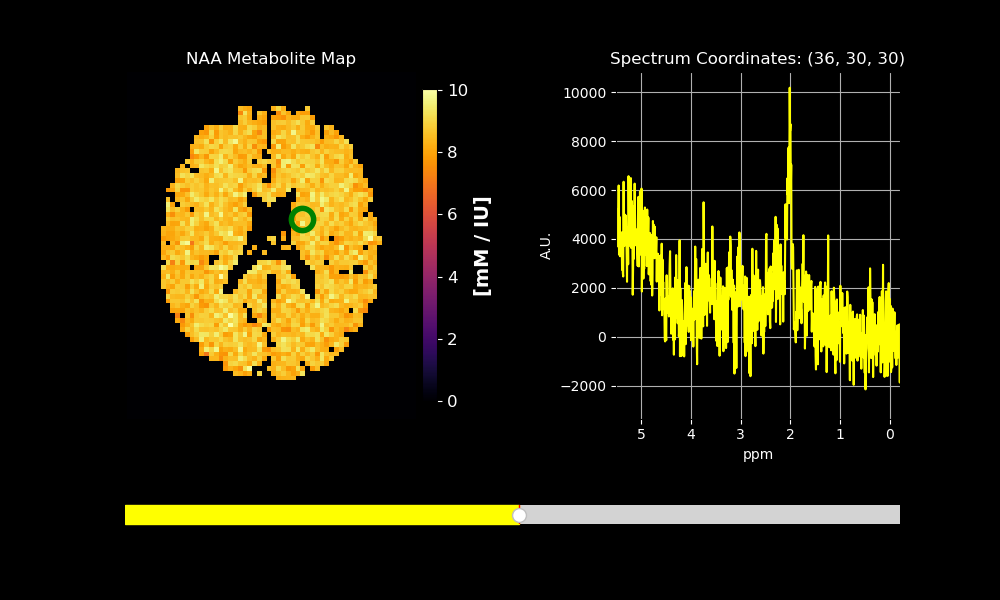

In [17]:
%matplotlib widget

with h5py.File(path2fulldata, 'r') as h5f:
    specs_full = h5f['mrsi_data'][:]

metab_map_full = phantom.create_metab_map(metab=metab_name)
fig, axs = plot_mrsi(spectra=specs_full, metab_map=metab_map_full, ppm_axis=ppm_axis, start_x=coordinates_high[0], start_y=coordinates_high[1], slice_idx=coordinates_high[2])

# Increase font size of the axes labels
axs[1].set_xlabel('ppm', fontsize=16)
axs[1].set_ylabel('A.U.', fontsize=16)
# Increase font size of the ticks
axs[1].tick_params(axis='both', which='major', labelsize=12)

Starting downsampling...
Downsampling MRSI data from (3.0, 3.0, 3.0) mm to (6.0, 6.0, 6.0) mm...
[########################################] | 100% Completed | 3.24 sms
Downsampling completed!
Starting metabolic map downsampling...
Downsampling metabolic map from (3.0, 3.0, 3.0) mm to (6.0, 6.0, 6.0) mm using block averaging...
[########################################] | 100% Completed | 106.03 ms
Metabolic map downsampling completed!


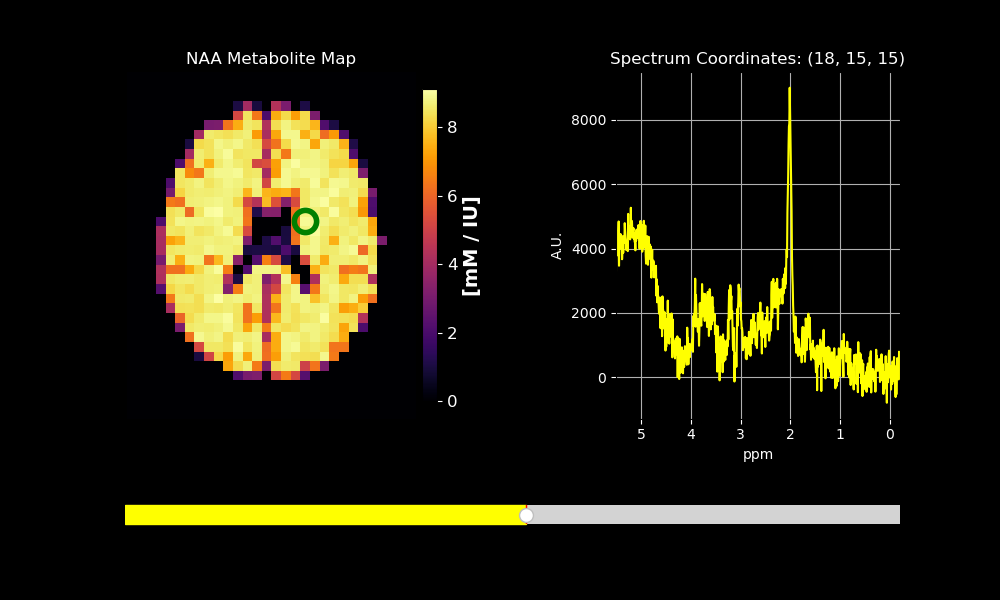

In [18]:
%matplotlib widget

target_resolution = (6.0, 6.0, 6.0)
reduced_data, new_affine = downsample_mrsi(path2fulldata, phantom.affine, target_resolution=target_resolution)
reduced_metab_map, _ = downsample_metab_map(metab_map_full, phantom.affine, target_resolution=target_resolution)

fig, axs = plot_mrsi(spectra=reduced_data, metab_map=reduced_metab_map, ppm_axis=ppm_axis, start_x=coordinates_low[0], start_y=coordinates_low[1], slice_idx=coordinates_low[2])

# Increase font size of the axes labels
axs[1].set_xlabel('ppm', fontsize=16)
axs[1].set_ylabel('A.U.', fontsize=16)
# Increase font size of the ticks
axs[1].tick_params(axis='both', which='major', labelsize=12)